In [27]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load Dataset
df = pd.read_csv("data/CAvideos.csv")
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [29]:
# Explore and Clean Dataset

print(df.shape)
print(df.columns)

# connvert dates
df["trending_date"] = pd.to_datetime(df["trending_date"], format="%y.%d.%m")
df["publish_time"] = pd.to_datetime(df["publish_time"])

# Extract useful time-based features
df["publish_hour"] = df["publish_time"].dt.hour
df["publish_day"] = df["publish_time"].dt.day_name()



(40881, 16)
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [30]:
# Engagement ratios
df["like_ratio"] = df["likes"] / (df["likes"] + df["dislikes"] + 1)
df["comment_ratio"] = df["comment_count"] / (df["views"] + 1)

df["title_length"] = df["title"].apply(len)
df["tag_count"] = df["tags"].apply(lambda x: 0 if x == "[none]" else len(x.split('|')))

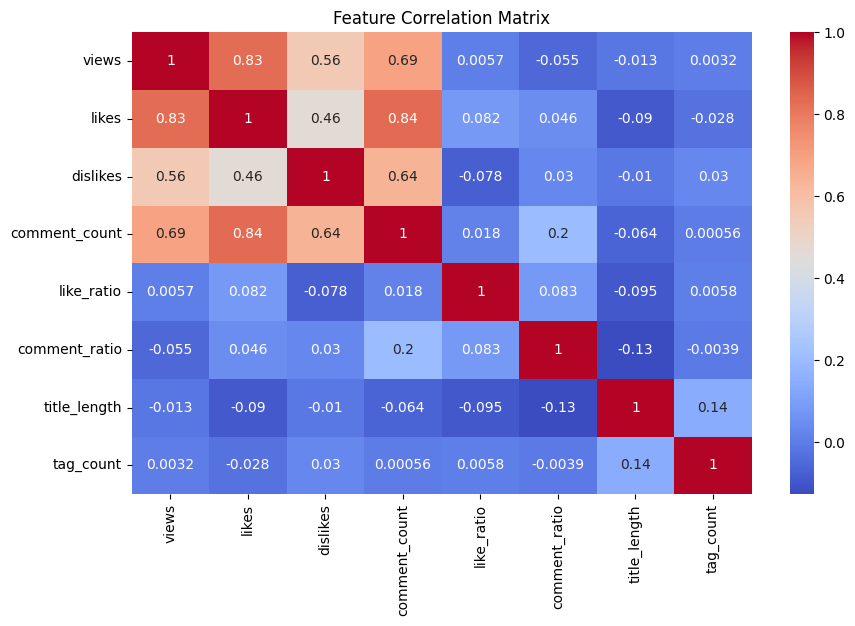

In [31]:
features = ["views", "likes", "dislikes", "comment_count", "like_ratio", "comment_ratio", "title_length", "tag_count"]
corr = df[features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


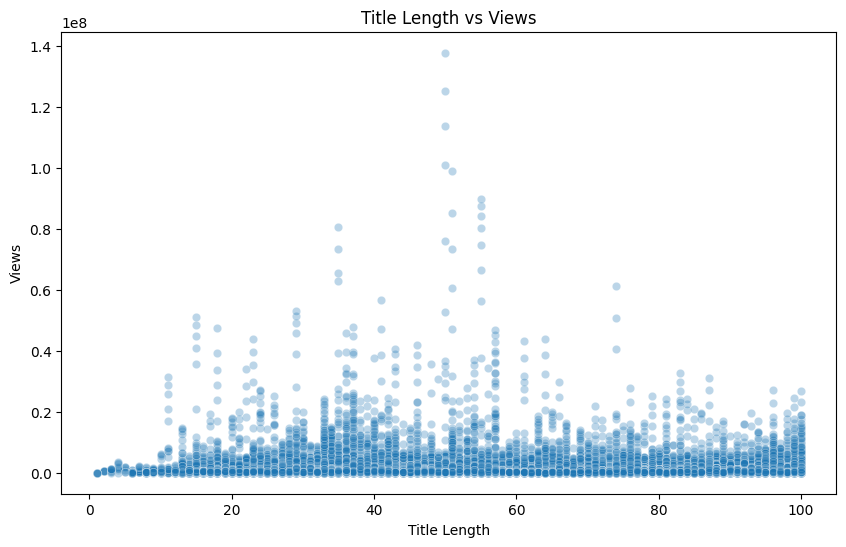

In [32]:
# Title length vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="title_length", y="views", alpha=0.3)
plt.title("Title Length vs Views")
plt.xlabel("Title Length")
plt.ylabel("Views")
plt.show()


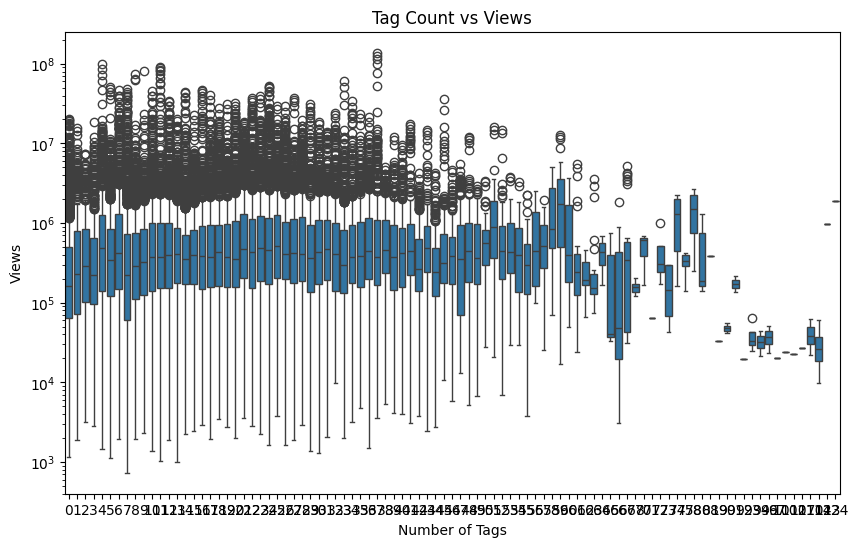

In [33]:
# Tag count vs views
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="tag_count", y="views")
plt.yscale("log")
plt.title("Tag Count vs Views")
plt.xlabel("Number of Tags")
plt.ylabel("Views")
plt.show()


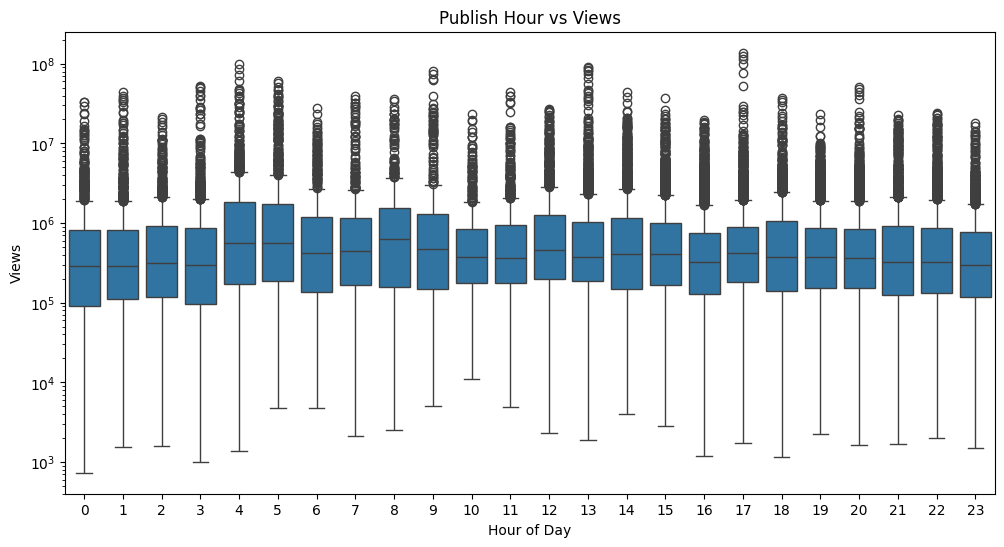

In [34]:
# Publish Hour vs Views
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="publish_hour", y="views")
plt.yscale("log")
plt.title("Publish Hour vs Views")
plt.xlabel("Hour of Day")
plt.ylabel("Views")
plt.show()


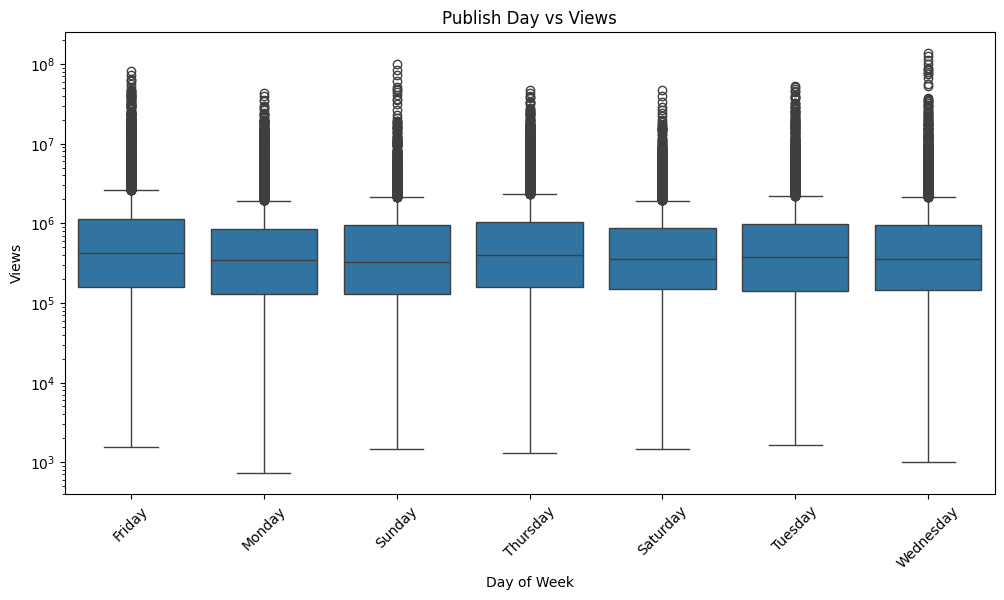

In [35]:
# Publish Day vs Views
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="publish_day", y="views")
plt.yscale("log")
plt.title("Publish Day vs Views")
plt.xlabel("Day of Week")
plt.ylabel("Views")
plt.xticks(rotation=45)
plt.show()

In [36]:
# Clickbait vs Non-Clickbait title analysis
clickbait_phrases = ['you won’t believe', 'insane', 'shocking', 'what happened next', 
    'top 10', 'top 5', 'the reason will surprise you', 
    'gone wrong', 'crazy', 'must watch', 'never seen before']

def is_clickbait(title):
    title = title.lower()
    for phrase in clickbait_phrases:
        if phrase in title:
            return True
    return False
df["is_clickbait"] = df["title"].apply(is_clickbait)
df.groupby("is_clickbait")[["views", "likes", "like_ratio", "comment_ratio"]].mean().round(2)



,views,likes,like_ratio,comment_ratio
is_clickbait,,,,
False,1153674.54,39921.36,0.92,0.01
True,718748.71,17733.55,0.93,0.01


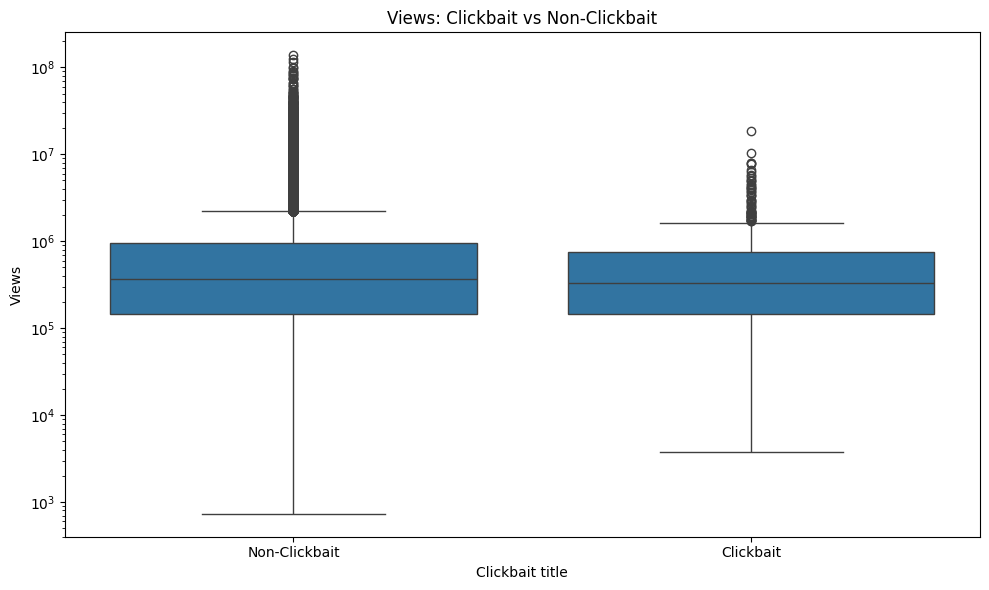

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="is_clickbait", y="views")
plt.yscale("log")
plt.title("Views: Clickbait vs Non-Clickbait")
plt.xlabel("Clickbait title")
plt.ylabel("Views")
plt.xticks([0, 1], ["Non-Clickbait", "Clickbait"])
plt.tight_layout()
plt.show()
